# Coding Linear Regression with Gradient Descent

Linear regression is represented as:

$\displaystyle h(x) = wx + b$, where

$w$ is weights vector,

$x$ is feature vector,

$b$ is the bias.

The cost function of this model is represented as the error between predicted values and actual values:

$\displaystyle J = \frac{1}{m}\sum^{l}_{i=1}(y_i - h(x_i))^2$, $m$ being total number of observations in the dataset.

In order to minimize **J** we need to find such a vector **w** at which **J** achieves its global minimum. Two popular ways to do that are **gradient descent** method and **ordinary least squares** method. We will stick to the first one.

Here, the key is to *iteratively* update weights into the direction of function slope at a current point. Thus, we need to compute partial derivatives of $J$ using $w$ and $b$.

Rewrite the function: $\displaystyle J = \frac{1}{m}\sum^{l}_{i=1}(y_i - (wx + b))^2$

$\displaystyle \frac{dJ}{dw} = -2x_i\frac{1}{m}\sum^{l}_{i=1}(y_i - h(x_i))$

$\displaystyle \frac{dJ}{db} = -2\frac{1}{m}\sum^{l}_{i=1}(y_i - h(x_i))$

### Data

The dataset contains 2 columns - "YearsExperience" and "Salary" for 30 employees. We will train the linear regression model to predict the salary of an employee based on the years of experience.

MSE:              24833669.481
Predicted values: [ 63949.38  93406.55 123813.96]
Real values:      [ 55794  98273 122391]


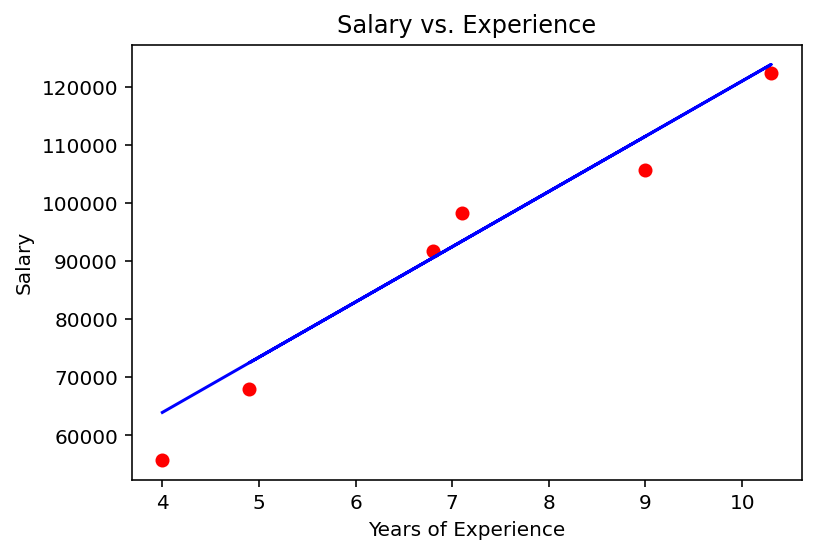

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'


class LinearRegression():
    def __init__(self, learning_rate=0.1, iterations=100):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.fit_state = False
    
    def fit(self, X, Y):
        self.m, self.n = X.shape  # number of training examples, number of features
        
        self.W = np.zeros(self.n)  # weights vector
        self.b = 0
        self.X = X
        self.Y = Y
        
        for i in range(self.iterations):  # gradient descent learning
            self.update_weights()
            
        self.fit_state = True
            
        return self
    
    def update_weights(self):
        Y_pred = self.predict(self.X)
        
        dW = - (2 * (self.X.T).dot(self.Y - Y_pred))/self.m  # transpose X (m,n) -> (n,m) for y (m,1)
        db = - (2 * np.sum(self.Y - Y_pred))/self.m
        
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db
        
        return self
        
    def predict(self, X):  # h(x) that returns values based on X matrix and current W vector
        return X.dot(self.W) + self.b
    
    def score(self, X_test, Y_test):
        if self.fit_state == False:
            print("Model is not fitted yet.")
            return self
        elif self.X.shape[1] != X_test.shape[1]:  # mismatch of number of columns
            print("X_test has features different from initial X_train.")
            return self
        else:
            return np.sum((self.predict(X_test) - Y_test)**2)/Y_test.shape[0]  # mean squared error

def main():
    
    df = pd.read_csv("../csv/salary_data.txt")
    
    X = df.iloc[:, :-1].values  # remove second (target) column
    Y = df.iloc[:, 1]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)  # (x,1) vectors
    
    model = LinearRegression(iterations=1000, learning_rate=0.01)
    model.fit(X_train, Y_train)
    
    Y_pred = model.predict(X_test)
    mse = model.score(X_test, Y_test)
    
    print(f"MSE:              {mse:.3f}")
    print(f"Predicted values: {np.round(Y_pred[:3], 2)}")
    print(f"Real values:      {Y_test.values[:3]}")
    
    plt.scatter(X_test, Y_test, color="red")
    plt.plot(X_test, Y_pred, color="blue")
    plt.title("Salary vs. Experience")
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.figsize=(10,5)
    
if __name__ == "__main__":
    main()